# Проведение анализа и подготовка плана действий по удержанию клиентов сети фитнес-центров "Культурист-датасаентист."

**Описание данных**

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
Данные клиента за предыдущий до проверки факта оттока месяц:
- **gender** — пол;
- **Near_Location** — проживание или работа в районе, где находится фитнес-центр;
- **Partner** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- **Promo_friends** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- **Phone** — наличие контактного телефона;
- **Age** — возраст;
- **Lifetime** — время с момента первого обращения в фитнес-центр (в месяцах).
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- **Contract_period** — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- **Month_to_end_contract** — срок до окончания текущего действующего абонемента (в месяцах);
- **Group_visits** — факт посещения групповых занятий;
- **Avg_class_frequency_total** — средняя частота посещений в неделю за все время с начала действия абонемента;
- **Avg_class_frequency_current_month** — средняя частота посещений в неделю за предыдущий месяц;
- **Avg_additional_charges_total** — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- **Churn** — факт оттока в текущем месяце.


**Цель исследования** - провести анализ и подготовить план действий по удержанию клиентов. 
А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.


**Ход исследования** - заказчик подготовил датасет в формате csv в котором содержатся данные клиента за предыдущий до проверки факта оттока месяц и информацию на основе журнала посещений, покупок и сведения о текущем статусе абонемента клиента. О качестве данных ничего неизвестно, на первоначальном этапе следует провести предварительный анализ данных на предмет полноты данных, наличия отсутствующих признаков, а также изучить средние значения и распределение признаков для тех клиентов, кто ушел и тех,кто остался. Изучить матрицу корреляции признаков. После выполнения предобработки данных необходимо построить модели бинарной классификации клиентов с помощью логистической регрессии и случайным лесом, где целевой признак — факт оттока клиента в следующем месяце. Сравнить и определить какая модель показала себя лучше на основании метрик accuracy, precision и recall. Следующим шагом выполним кластеризацию клиентов, построим матрицу расстояний и визуализируем ее с помощью дендрограммы. Сформируем выводы на основе средний значений признаков и определим какие кластеры склонны к оттоку. Предложим рекомендации для улучшения стратегии удержания клиентов.

Этапы исследования:
- [Шаг 1. Загрузка данных.](#general_id)
- [Шаг 2. Проведение исследовательского анализа данных (EDA).](#step_two)
- [Шаг 3. Построение модели прогнозирования оттока клиентов.](#step_three)
- [Шаг 4. Кластеризация.](#step_four)
- [Общий вывод](#conclusion_id)



### Шаг. Загрузка и выполнение предобработки данных.
<a id=general_id></a>
Загрузите данные
Путь к файлу: /datasets/gym_churn.csv.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
!pip install plotly
from plotly import graph_objects as go
import plotly.express as px 
from scipy import stats as st
pd.set_option('display.float_format', '{:,.2f}'.format)
import random
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools

In [2]:
#загружаем инфомрацию из лога приложения
try:  
    data = pd.read_csv('/datasets/gym_churn.csv')
    
except:
    data = pd.read_csv('/datasets/gym_churn.csv')

### Шаг. Проведение исследовательского анализа данных (EDA).
<a id=step_two></a>

Создадим функцию research для изучения данных в таблице.

In [3]:
def research (data):
    data.info(memory_usage='deep')
    display(data.head(11))
    display(data.describe())
    print('\033[1m' + 'Количество дубликатов' + '\033[1m',data.duplicated().sum())

In [4]:
research(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
5,1,1,0,0,1,1,1,34,450.74,1.00,3,2.62,2.64,0
6,1,1,1,1,0,6,1,32,94.27,6.00,2,1.14,1.28,0
7,0,1,0,0,1,1,0,30,217.79,1.00,0,1.21,1.05,1
8,1,1,1,1,1,1,1,23,45.41,1.00,1,1.11,1.06,0
9,0,1,0,0,1,1,0,31,65.31,1.00,11,1.81,1.95,0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Количество дубликатов 0


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [5]:
#приведем наименования столбцов к нижнему регистру
data.columns = [x.lower() for x in data.columns]

In [6]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.90,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.90,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


Средние значения по ушедшим Клиентам ниже чем среднее значения по оставшимся Клиентам по следующим признакам:

- участник акции "Приведи друга";
- длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- срок до окончания текущего действующего абонемента (в месяцах);
- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- средняя частота посещений в неделю за предыдущий месяц;
- сотрудник Компании-партнера;
- возраст;
- средняя частота посещений в неделю за все время с начала действия абонемента;
- суммарная выручка от других услуг фитнес-центр;
- посещение групповых занятий;
- проживание или работа в районе, где находится фитнес-центр.


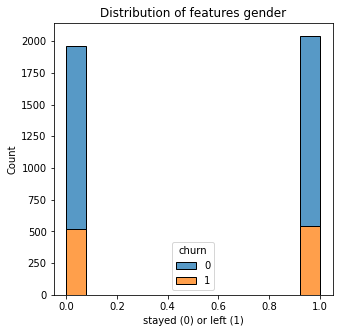

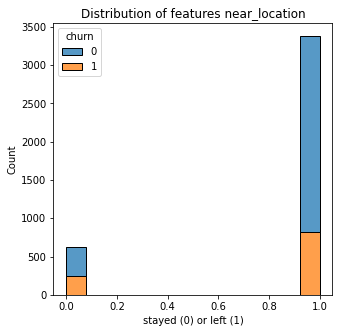

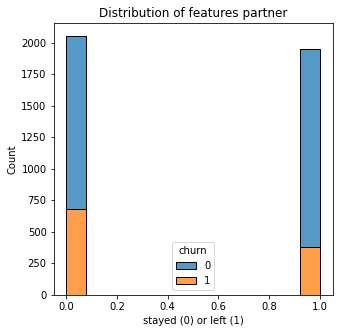

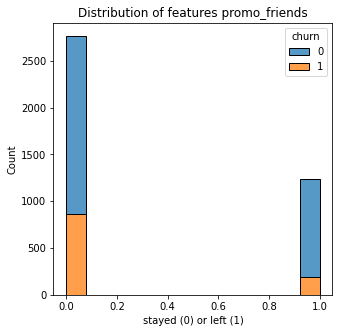

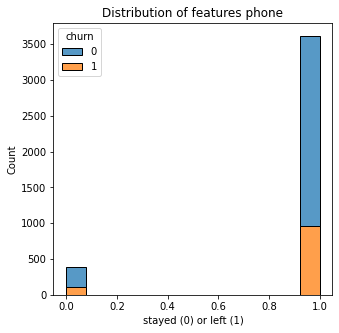

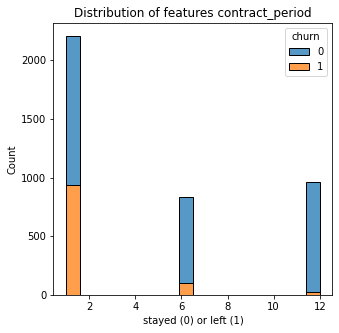

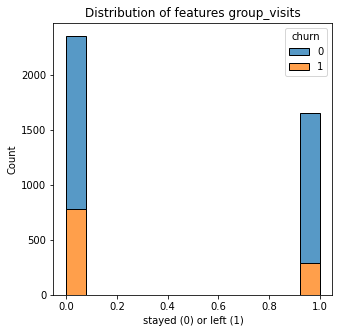

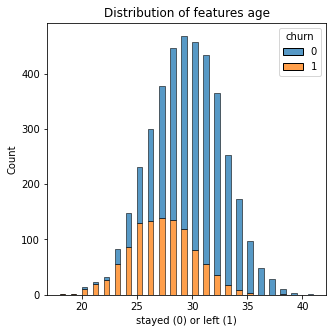

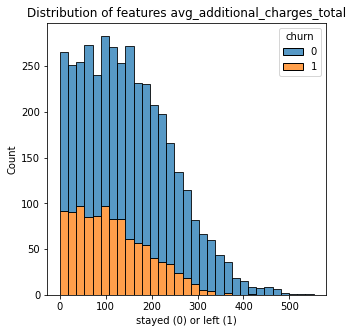

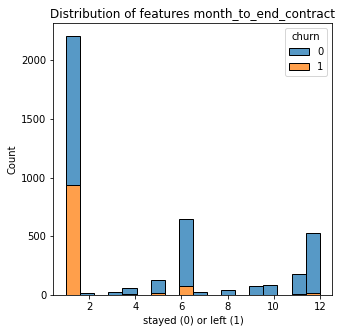

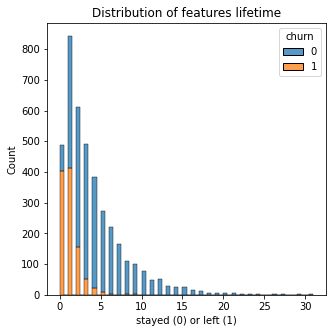

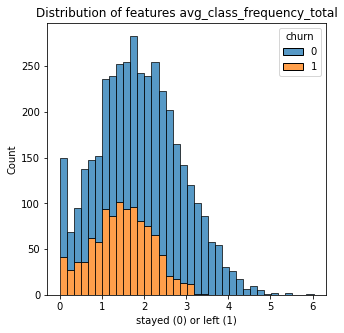

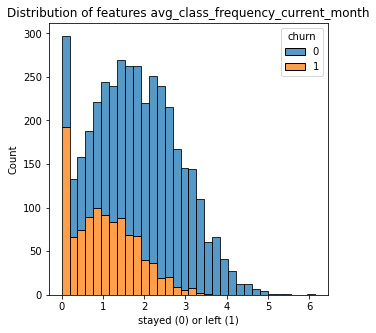

In [7]:
#Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).
for col in data.drop('churn',axis=1).columns:

    plt.rcParams['figure.figsize']=5,5
    sns.histplot(data, x=data[col], hue=data['churn'], multiple = 'stack')
    plt.title('Distribution of features {}'.format(col))

    plt.xlabel('stayed (0) or left (1)')

    plt.show()


Исходя из сформированной гистрограммы можно предположить,что на удержание Клиентов оказывают влияние такие признаки как:
- сотрудник Компании-партнера;
- участник акции "Приведи друга";
- длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- посещение групповых занятий;
- суммарная выручка от других услуг фитнес-центр;
- срок до окончания текущего действующего абонемента (в месяцах);
- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- проживание или работа в районе, где находится фитнес-центр;
- возраст;
- средняя частота посещений в неделю за все время с начала действия абонемента;
- средняя частота посещений в неделю за предыдущий месяц.

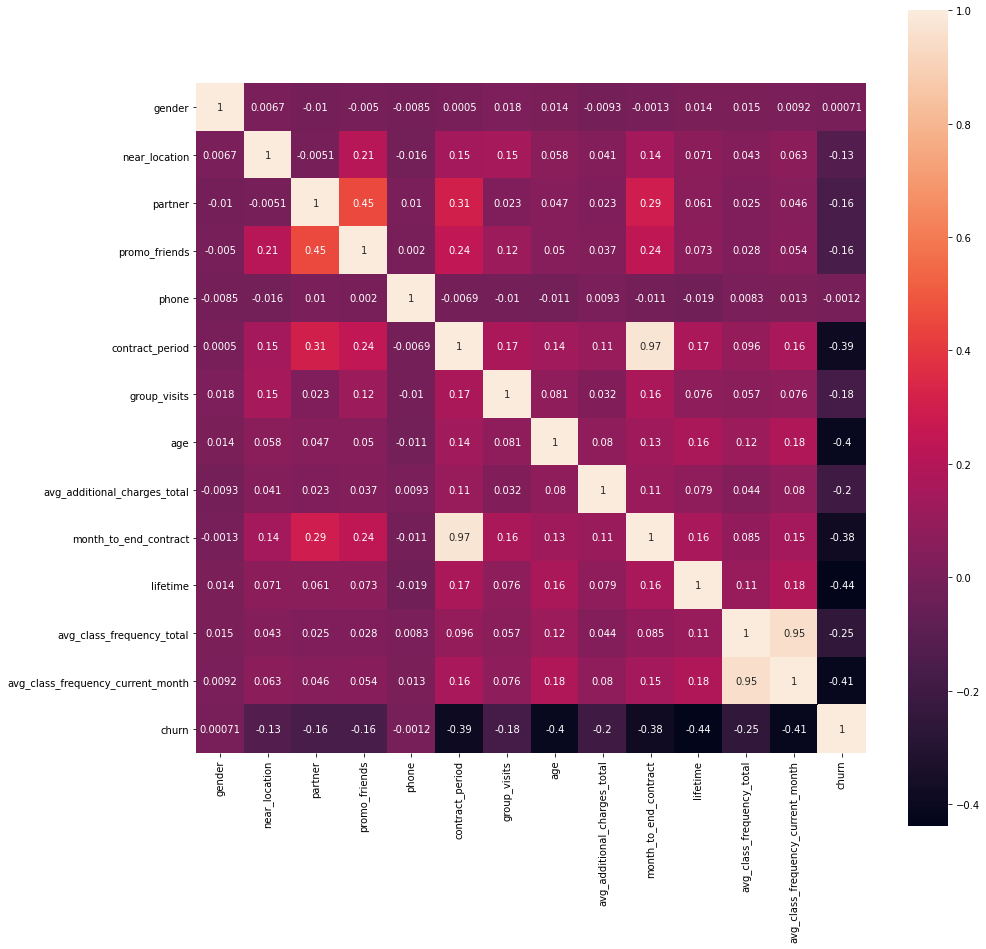

In [8]:
#построим и отрисуем матрицу корреляций
cm = data.corr() #вычисляем матрицу корреляций

plt.rcParams['figure.figsize']=15,15

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True)


plt.show()

Матрица корреляций подтверждает наибольшую обратную зависимость оттока Клиентов по признакам:
- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- средняя частота посещений в неделю за предыдущий месяц;
- возраст;
- длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- срок до окончания текущего действующего абонемента (в месяцах);
- средняя частота посещений в неделю за все время с начала действия абонемента;
- суммарная выручка от других услуг фитнес-центр;
- посещение групповых занятий;
- сотрудник Компании-партнера;
- участник акции "Приведи друга";
- проживание или работа в районе, где находится фитнес-центр.

In [9]:
data=data.drop('month_to_end_contract',axis=1)

#### Вывод

При проведении исследовательского анализа данных (EDA) пропущенные значения не были обнаружены.
В таблице задан числовой формат для признаков.
Наименования колонок приведены к нижнему регистру.
Таблица состоит из данных о 4000 Клиентах и 14 признаков Клиентов. 

При выполнении группировки таблицы по признаку оттока Клиентов и изучении средних значений признаков,гистрограммы, а также матрицы корреляции выявлена обратная зависимость оттока Клиентов от следующих признаков:

- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- средняя частота посещений в неделю за предыдущий месяц;
- возраст;
- длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- срок до окончания текущего действующего абонемента (в месяцах);
- средняя частота посещений в неделю за все время с начала действия абонемента;
- суммарная выручка от других услуг фитнес-центр;
- посещение групповых занятий;
- сотрудник Компании-партнера;
- участник акции "Приведи друга";
- проживание или работа в районе, где находится фитнес-центр.

Чем меньше показатель признака,тем больше вероятность ухода Клиента.

Наибольшее влияние (более 40%) на показатель оттока Клиентов влияют следующие признаки:
- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- средняя частота посещений в неделю за предыдущий месяц;
- возраст;
- длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- срок до окончания текущего действующего абонемента (в месяцах).

### Шаг.  Построение модели прогнозирования оттока клиентов.
<a id=step_three></a>

In [10]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X=data.drop('churn',axis=1)
y=data['churn']

#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для нашей модели
model = LogisticRegression(solver='liblinear',random_state=0)
# обучим модель
model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:, 1]

# округлим результаты до целого числа
probabilities=[round(v,0) for v in probabilities]

# выведем результаты
print('Планируемый отток: {:.0f} человека, что составляет {:.0%} от общего числа Клиентов.'.format(sum(probabilities),sum(probabilities)/len(probabilities)))

# выведем все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))



Планируемый отток: 192 человека, что составляет 24% от общего числа Клиентов.
Accuracy: 0.92
Precision: 0.85
Recall: 0.83


In [11]:
# зададим алгоритм для нашей модели
model = RandomForestClassifier(random_state=0)
# обучим модель
model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilities = model.predict_proba(X_test_st)[:, 1]

# бинарный прогноз
predictions = model.predict(X_test_st)


probabilities=[round(v,0) for v in probabilities]

print('Планируемый отток: {:.0f} человека, что составляет {:.0%} от общего числа Клиентов.'.format(sum(probabilities),sum(probabilities)/len(probabilities)))


# выведите все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))


Планируемый отток: 193 человека, что составляет 24% от общего числа Клиентов.
Accuracy: 0.91
Precision: 0.83
Recall: 0.81


#### Вывод

На основании модели бинарной классификации клиентов построенной с помощью логистической регрессии планируемый отток Клиентов на прогнозный месяц составил 192 человека, что составляет 24% от общего числа Клиентов, при построении модели  случайным лесом, отток Клиентов на прогнозный месяц составил 193 человека, что составляет 24% от общего числа Клиентов.

Доля правильных ответов (accuracy) точнее на 0.01 при построении модели с помощью логистической регрессии.

### Шаг.  Кластеризация.
<a id=step_four></a>

Нарисуем дендограмму в Python.

In [12]:
#исключим столбец с признаком оттока клиентов
X=data.drop('churn',axis=1)

# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#В переменной linked сохранена таблица «связок» между объектами. 
linked = linkage(X_sc, method = 'ward') 

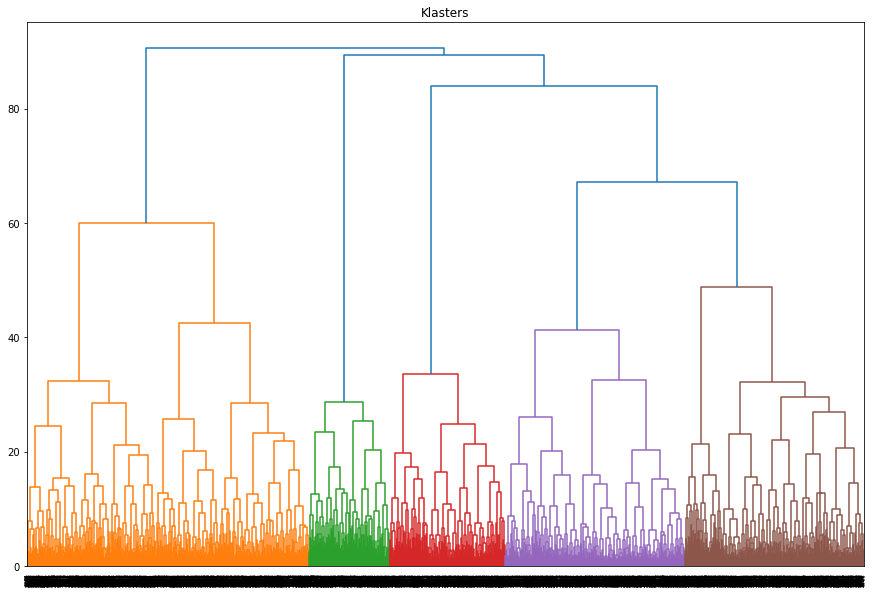

In [13]:
#визуализируем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Klasters')
plt.show() 

Предложенное оптимальное число кластеров 5 — четыре разных цвета на графике.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Число кластеров примем n=5.

In [14]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(data)

# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0) 

# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(X_sc) 

# сохраняем метки кластера в поле нашего датасета
data['cluster'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters=data.groupby('cluster').mean()
display(clusters)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,
0,0.50,0.97,0.91,0.98,1.00,7.78,0.56,29.84,157.66,4.66,2.00,2.00,0.01
1,0.53,0.86,0.47,0.31,0.00,4.77,0.43,29.30,144.10,3.93,1.85,1.72,0.27
2,0.55,0.84,0.33,0.06,1.00,4.92,0.44,29.97,159.24,4.71,2.91,2.91,0.00
3,0.51,0.76,0.34,0.18,1.00,1.65,0.26,26.90,115.45,0.98,1.45,1.02,1.00
4,0.47,0.81,0.40,0.06,1.00,4.62,0.40,30.11,158.52,4.63,1.14,1.14,0.00


Исходя из полученных средних значений можно заметить,что в 1 и 3 кластер попали Клиенты с высокой вероятностью оттока. Остальные закономерности заметить сложнее, поэтому прибегнем к визуализации данных.

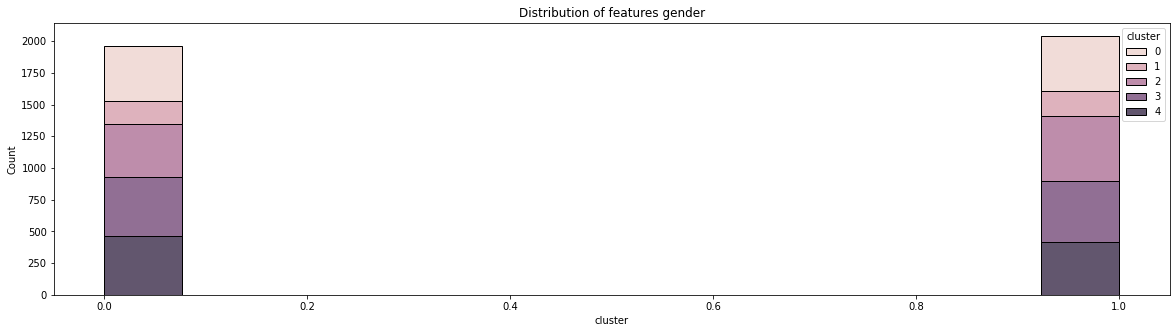

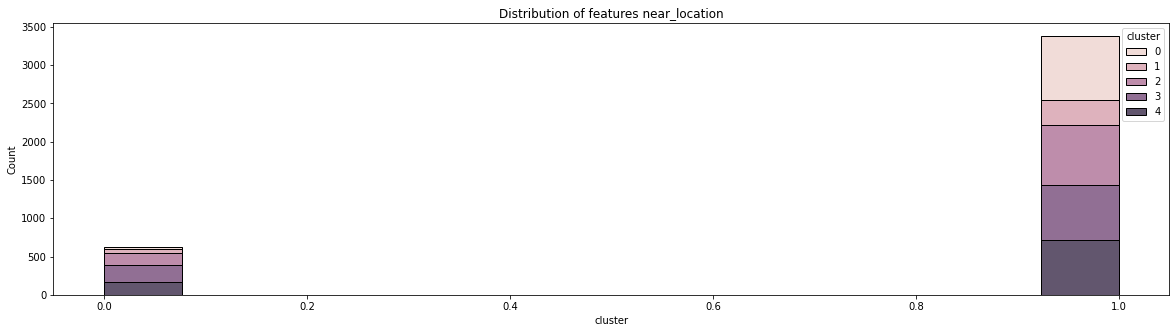

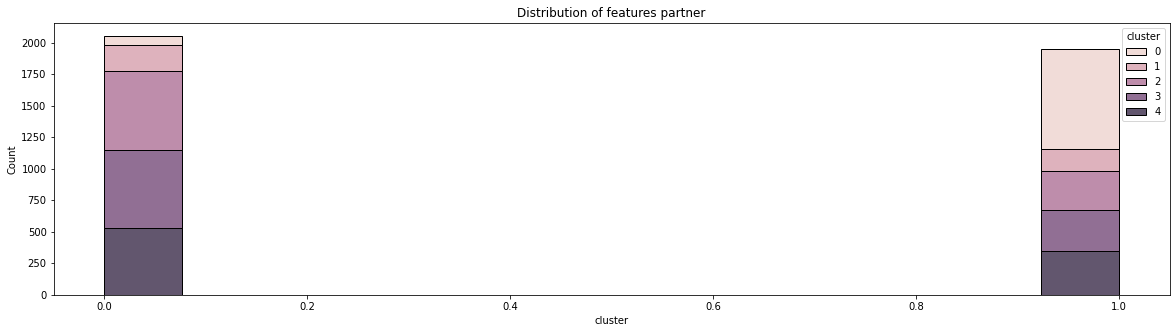

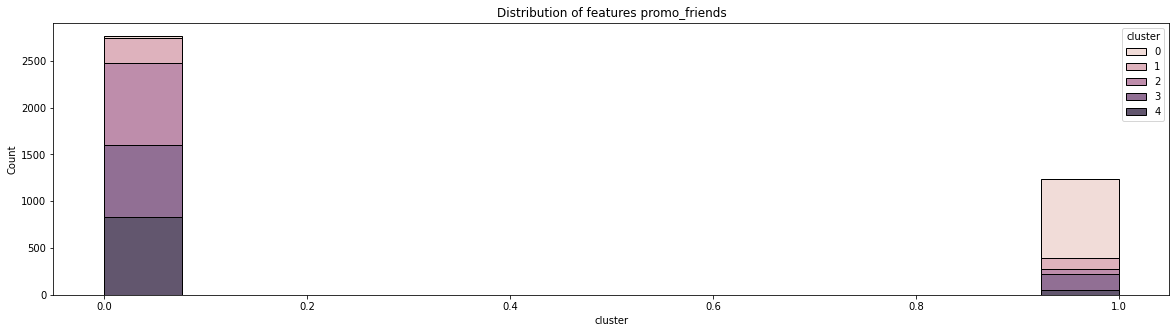

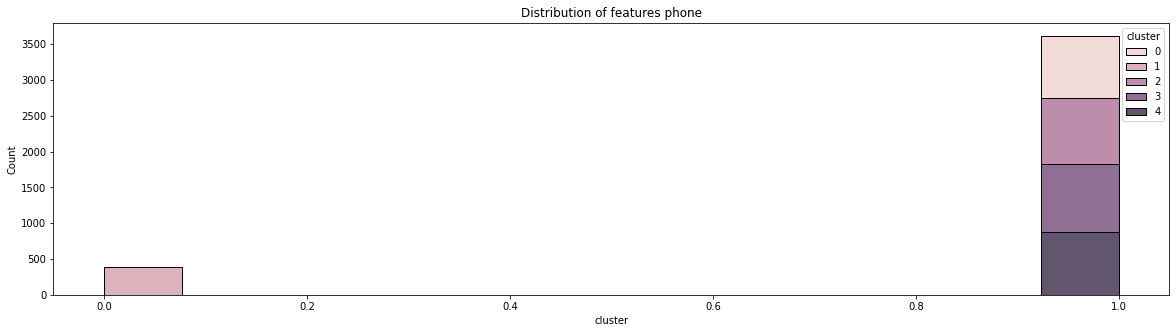

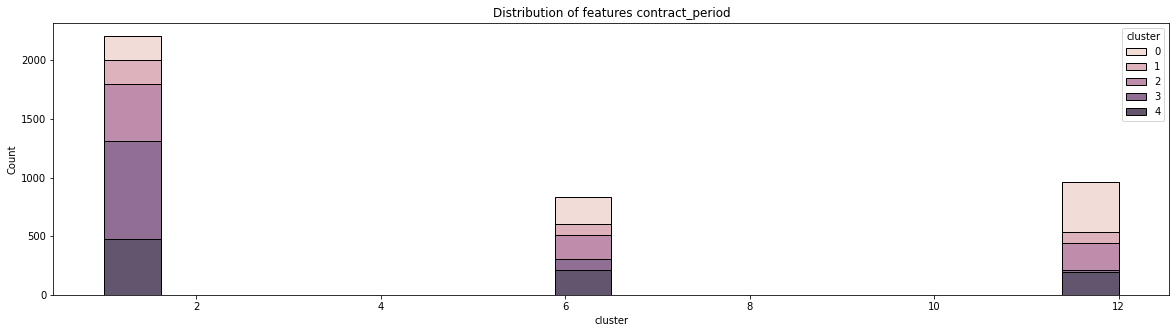

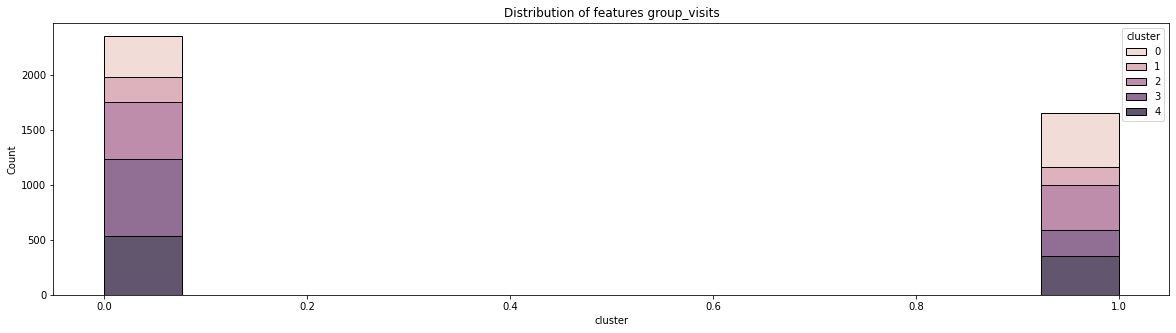

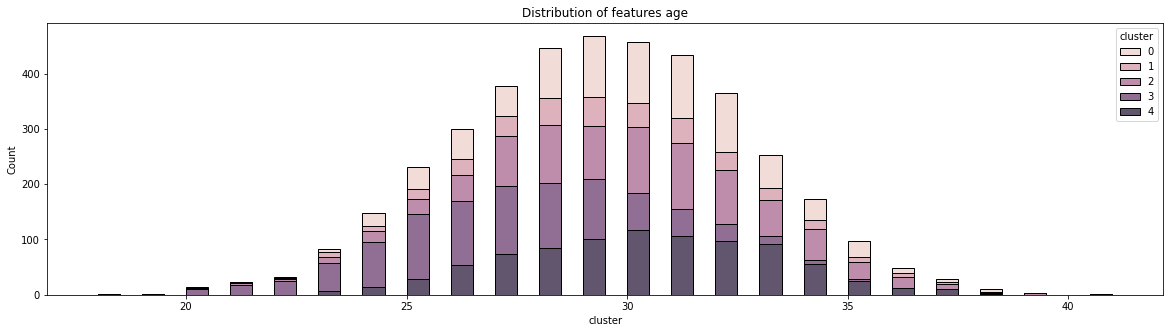

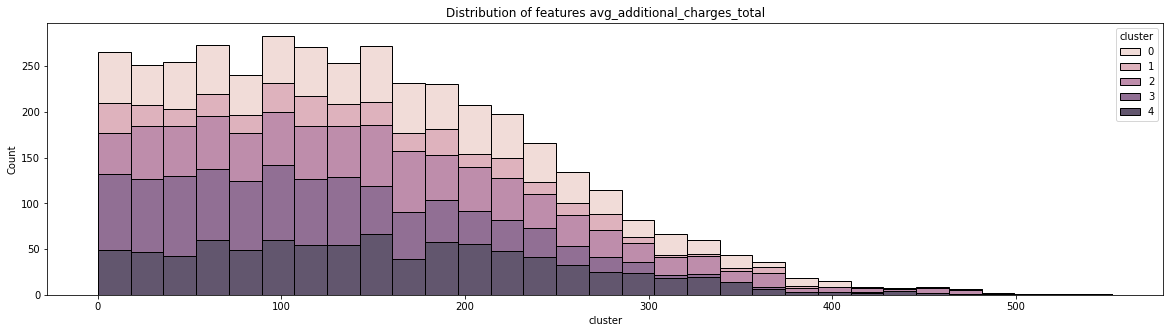

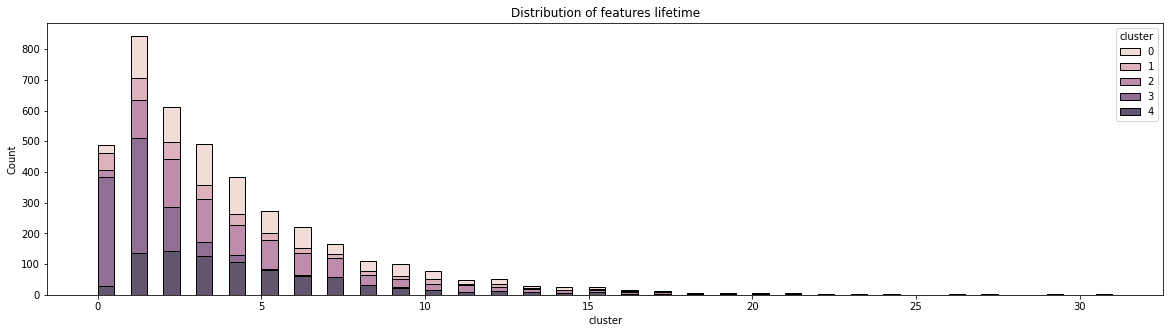

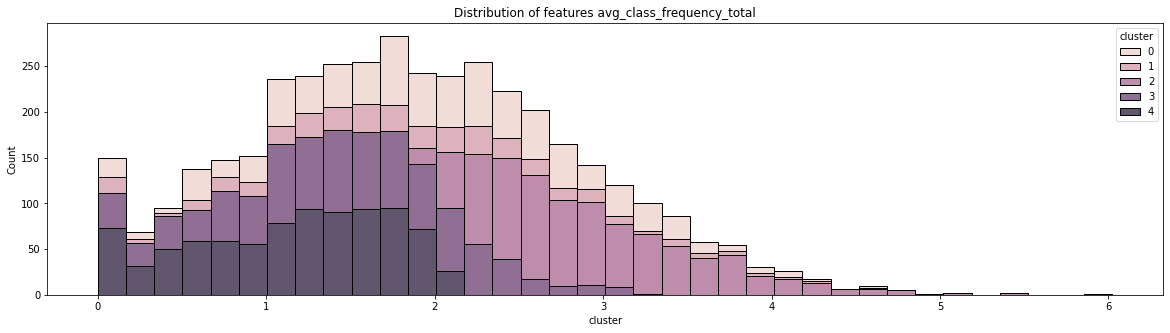

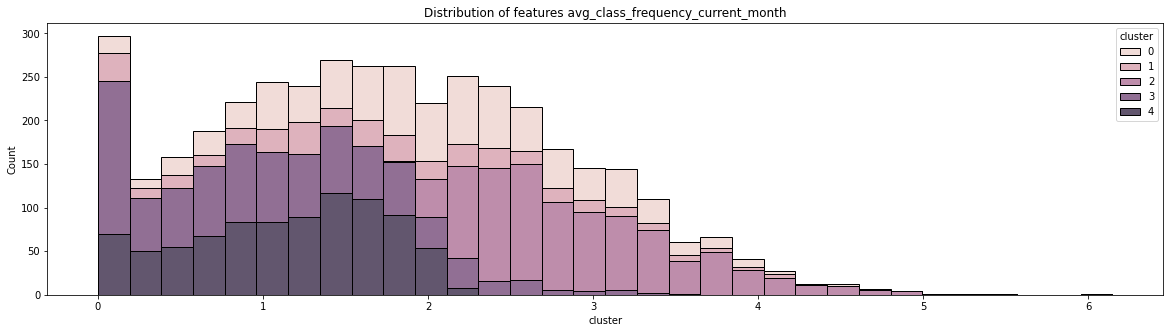

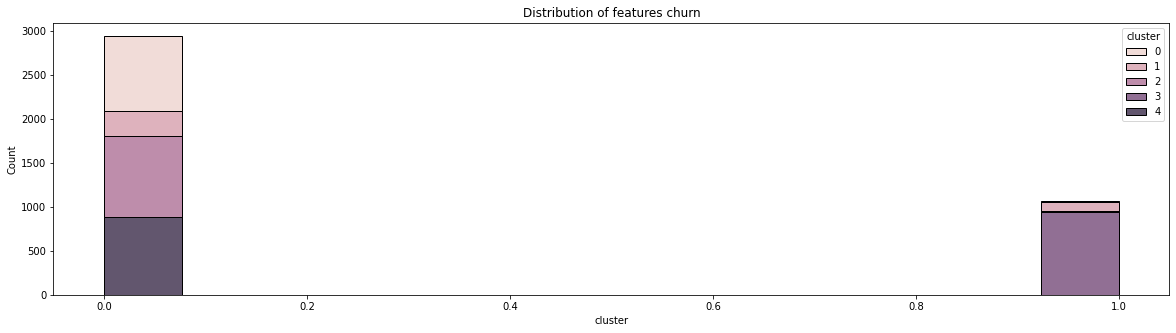

In [15]:

for col in data.drop('cluster',axis=1).columns:

    plt.rcParams['figure.figsize']=20,5
    sns.histplot(data.drop('cluster',axis=1), x=data[col], hue=data['cluster'], multiple = 'stack')
    plt.title('Distribution of features {}'.format(col))

    plt.xlabel('cluster')

    plt.show()

По кластерам с наибольшей вероятностью оттока 1 и 3 низкие значения по признакам:
    
- участник акции "Приведи друга";
- длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- средняя частота посещений в неделю за предыдущий месяц;
- сотрудник Компании-партнера;
- средняя частота посещений в неделю за все время с начала действия абонемента;
- суммарная выручка от других услуг фитнес-центр;
- посещение групповых занятий;

Явные различия между кластерами лишь в том, что к 3 кластеру относятся Клиенты,которые проживают в большей удаленности от фитнес-центра,а ко 1 кластеру относятся более молодые Клиенты с более низким лайфтаймом.

К 0,2,4 кластеру относятся интересующие нас Клиенты.
У Всех трех кластеров высокие показатели по признакам:
- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- суммарная выручка от других услуг фитнес-центр;
- возраст;
- проживание или работа в районе, где находится фитнес-центр.


Клиенты 2 и 4 кластера заключают контракты на более короткий срок и меньше Клиентов, сотрудников наших партнеров, чем у Клиентов 0 кластера. А также, практически нет участников акции "приведи друга".

Клиенты 4 кластера реже посещают фитнес-центр.

А Клиенты 0 кластера имеют высокие показатели по всем признакам.


In [16]:
#выведем долю оттока
display(data.groupby('cluster').mean()['churn'].sort_values())

cluster
4   0.00
2   0.00
0   0.01
1   0.27
3   1.00
Name: churn, dtype: float64

Доля оттока подтверждает то,что к 0,2,4 кластерам относятся остающиеся Клиенты. В 3 кластере клиентов,покидающих фитнес-клуб большее, а во 1 кластере 27% уходящих Клиентов.

#### Вывод

Исходя из результатов дендрограммы, при расчете модели кластеризации на основании алгоритма K-Means было спрогнозировано 5 кластеров Клиентов.

В 1 кластере количество уходящих Клиентов составило около 27% , для них характерны низкие показатели по признакам:
- участник акции "Приведи друга";
- длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- срок до окончания текущего действующего абонемента (в месяцах);
- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- средняя частота посещений в неделю за предыдущий месяц;
- сотрудник Компании-партнера;
- средняя частота посещений в неделю за все время с начала действия абонемента;
- суммарная выручка от других услуг фитнес-центр;
- посещение групповых занятий;
- **возраст.**

В 3 кластере количество уходящих Клиентов составило около 100% , для них характерны низкие показатели по признакам:
- **проживание или работа в районе, где находится фитнес-центр.**
- участник акции "Приведи друга";
- длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- срок до окончания текущего действующего абонемента (в месяцах);
- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- средняя частота посещений в неделю за предыдущий месяц;
- сотрудник Компании-партнера;
- средняя частота посещений в неделю за все время с начала действия абонемента;
- суммарная выручка от других услуг фитнес-центр;
- посещение групповых занятий;


В 0,2,4 кластерах в основном те Клиенты,которые остаются.
У Всех трех кластеров высокие показатели по признакам:
- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- суммарная выручка от других услуг фитнес-центр;
- возраст;
- проживание или работа в районе, где находится фитнес-центр.


Клиенты 2,4 кластера заключили контракт на короткий срок, не являются сотрудниками компании-партнера и не участвуют в акции "Приведи друга".

Клиенты 4 кластера реже посещают фитнес-центр.

А Клиенты 0 кластера имеют высокие показатели по всем признакам.


### Шаг.  Общий вывод.
<a id=conclusion_id></a>

На первоначальном этапе была выполнена предобработка данных,выгруженных из датасета Клиента в формате csv. Датасет содержал данные за предыдущий до проверки факта оттока месяц,а именно информацию на основе журнала посещений, покупок и сведения о текущем статусе абонемента клиента.

При проведении исследовательского анализа данных (EDA) пропущенные значения не были обнаружены.
Наименования колонок приведены к нижнему регистру.
Таблица состоит из данных о 4000 Клиентах и 14 признаков Клиентов. 

При построении матрицы корреляции между признаками "длительность текущего действующего абонемента (месяц, 6 месяцев, год)" и "срок до окончания текущего действующего абонемента (в месяцах)" отмечена сильная взаимная корреляция, то есть наблюдается сильная линейная зависимость. Для исключения мультиколлинеарности, показатель "срок до окончания текущего действующего абонемента (в месяцах)" был исключен из таблицы.

При выполнении группировки таблицы по признаку оттока Клиентов и изучении средних значений признаков,гистрограммы, а также матрицы корреляции выявлена наибольшая обратная зависимость оттока Клиентов(более 40%) от следующих признаков:

- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- средняя частота посещений в неделю за предыдущий месяц;
- возраст;
- длительность текущего действующего абонемента (месяц, 6 месяцев, год).

На основании модели бинарной классификации клиентов построенной с помощью логистической регрессии планируемый отток Клиентов на прогнозный месяц составил 192 человека, что составляет 24% от общего числа Клиентов, при построении модели  случайным лесом, отток Клиентов на прогнозный месяц составил 193 человека, что составляет 24% от общего числа Клиентов.

Доля правильных ответов (accuracy) точнее на 0.01 при построении модели с помощью логистической регрессии.

При выполнении кластеризации данных наибольший отток Клиентов был замечен в 3 кластере (около 100%).
По Клиентам данного кластера замечены низкие показатели по признакам:
- участник акции "Приведи друга";
- длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- время с момента первого обращения в фитнес-центр (в месяцах). Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента;
- средняя частота посещений в неделю за предыдущий месяц;
- сотрудник Компании-партнера;
- средняя частота посещений в неделю за все время с начала действия абонемента;
- суммарная выручка от других услуг фитнес-центр;
- посещение групповых занятий;
- **возраст.**

По результатам исследования можно сделать вывод,что основной сегмент интересующих нас Клиентов.
Проживает недалеко от фитнес - клуба, средний возраст около 30 лет, длительность абонемента более 8 месяцев,чаще они являются сотрудниками Компаний-партнеров и участниками акции "Приведи друга".

Для увеличения портфеля Клиентов отделу маркетинга рекомендуется:
- продолжить проведение акции "Приведи друга";
- расширить список "Компаний-партнеров" и привлечь их сотрудников с помощью индивидуальных условий;
- в рамках проведения рекламы в интернете отдать предпочтение пользователям,проживающим или работающим недалеко от фитнес-клуба в возрасте около 30 лет;
- рассмотреть увеличение минимального срока заключения контракта;
- для увеличения периода удержания Клиента, предложить пролонгацию контрактов на индивидуальных условиях для действующих Клиентов.
- делать беплатные пробные групповые занятия, чтобы клиенты-одиночки смогли вливаться в жизнь фитнес-центра;  
- поощрать клиентов, которые посещают фитнес 3 и более раз в неделю, различными скидками.



